<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/academia/predictiveModeling/code/linear_regression_cubic_zirconia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone git repository

> add the code below to authenticate the repository



# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.tools as sm
from statsmodels.regression.linear_model import OLS


import warnings
warnings.filterwarnings('ignore')

# Import data

In [2]:
#os.chdir('/content/hogwarts/academia/predictiveModeling/data'); os.getcwd()

In [3]:
rd = pd.read_csv('../data/cubic_zirconia.csv'); rd.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


# Basic EDA

In [4]:
#create a copy of dataframe
df = rd.copy(); df.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499


In [5]:
#drop the unnamed column
df.drop('Unnamed: 0', axis =1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB




1.   The features cut, color & clarity are categorical variables and have object data type which is expected
2.   The rest of the columns are continous & have either float or int data type which again is expected
3. depth seems to have missing values



In [7]:
df_cat = df[['cut','color','clarity']]
df_con = df[['carat','depth','table','x','y','z','price']]

In [8]:
df_con.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [9]:
df_con.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64



1.   The features x, y, & z have minimum value as 0, which is an indicator that these are missing values
2. All the continous columns have skewness score much higher than (+/-)0.05, indicating the data is not normally distributed. This can be further help us deduce the distribution character of the features



Normality test for carat
Statitics = 0.893, p value = 0.000


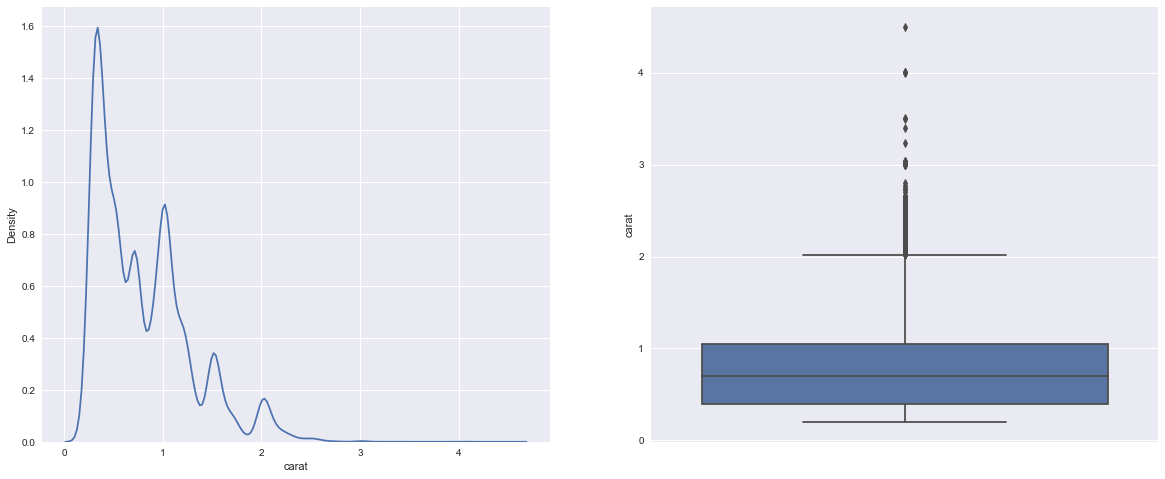

carat is not normally distributed.

Normality test for depth
Statitics = nan, p value = 1.000


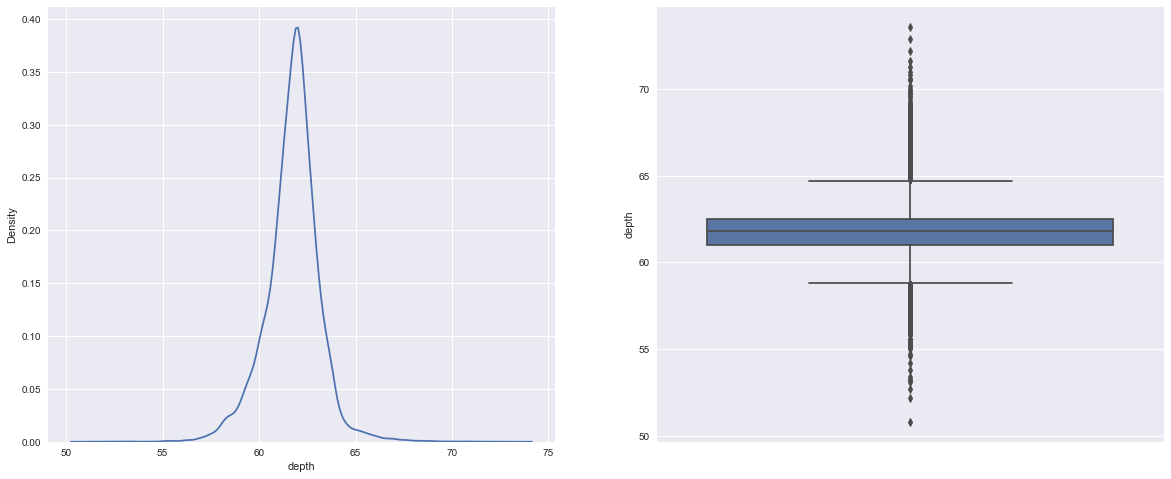

depth is normally distribution and has Gaussian curve.

Normality test for table
Statitics = 0.955, p value = 0.000


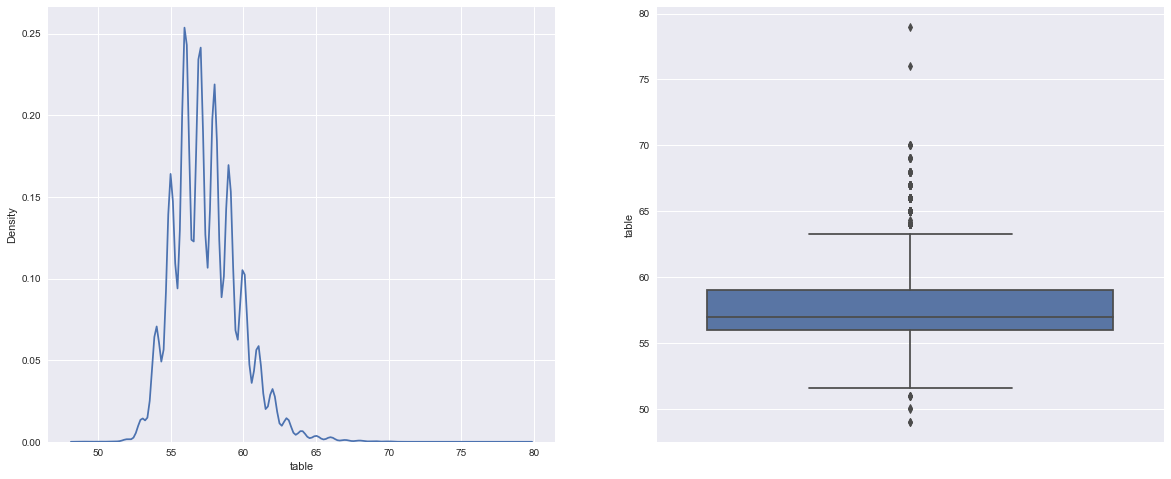

table is not normally distributed.

Normality test for x
Statitics = 0.955, p value = 0.000


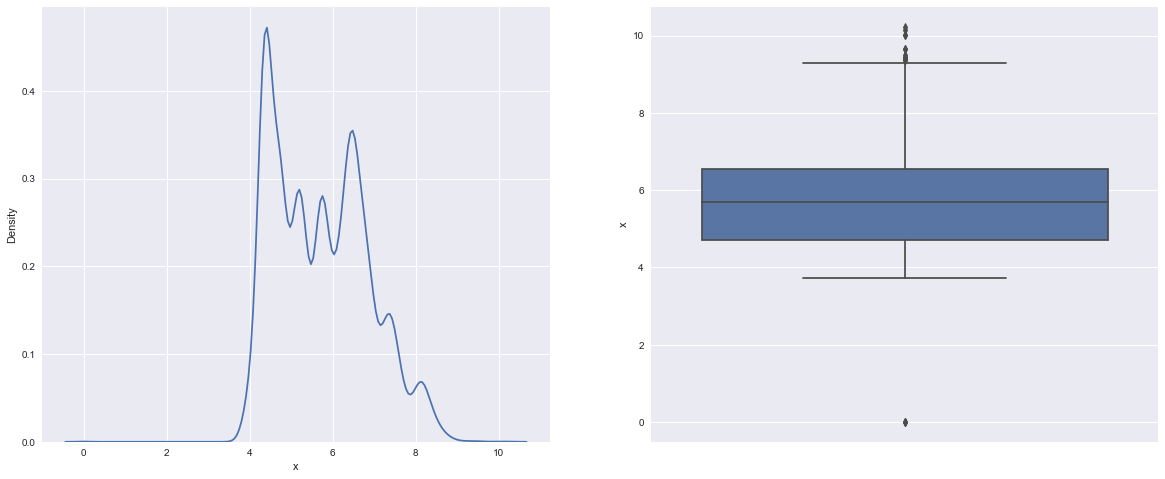

x is not normally distributed.

Normality test for y
Statitics = 0.894, p value = 0.000


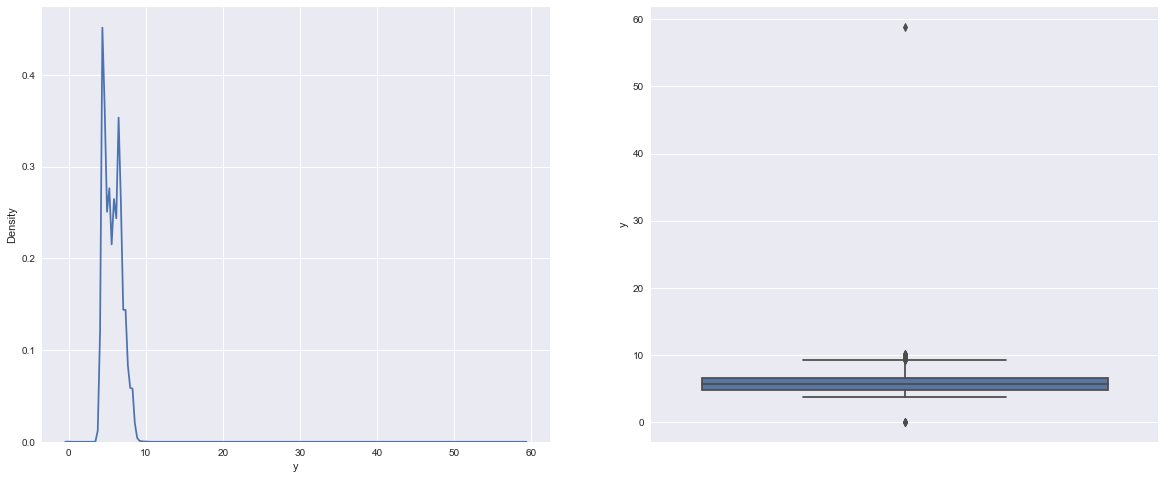

y is not normally distributed.

Normality test for z
Statitics = 0.912, p value = 0.000


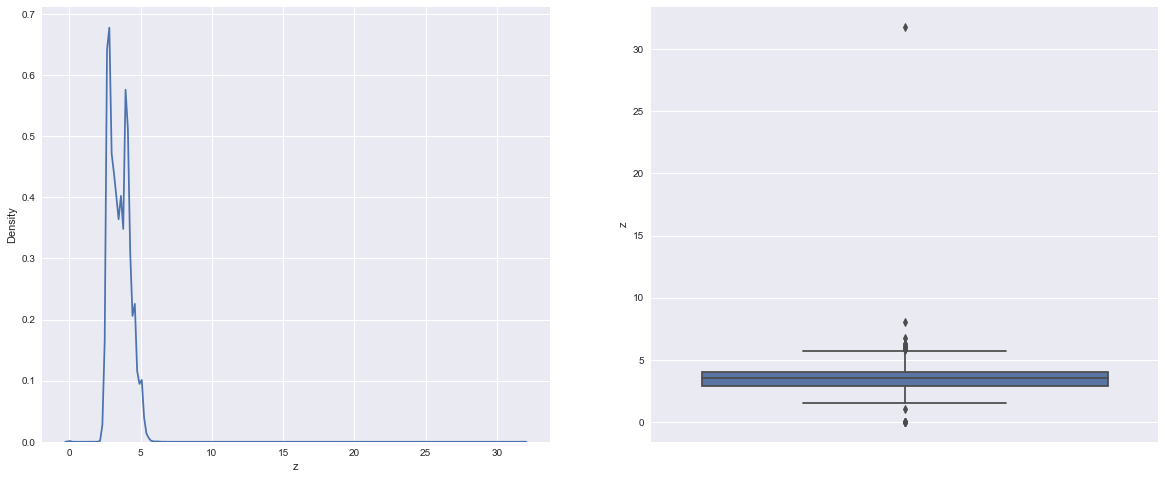

z is not normally distributed.

Normality test for price
Statitics = 0.796, p value = 0.000


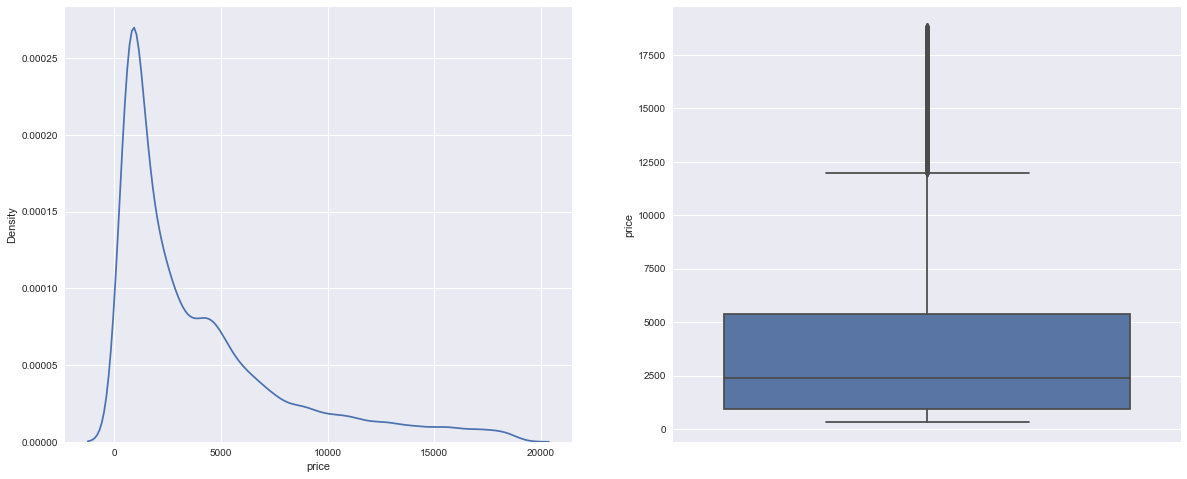

price is not normally distributed.



In [10]:
from scipy.stats import shapiro as shapiro

for feature in df_con.columns:
    stats, p_val = shapiro(rd[feature])
    print('Normality test for', feature)
    print('Statitics = %.3f, p value = %.3f' % (stats, p_val))
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    sns.kdeplot(ax=axes[0], x=df_con[feature])
    sns.boxplot(ax=axes[1], y=df_con[feature])
    plt.show()
    if p_val > 0.05: print(feature, 'is normally distribution and has Gaussian curve.\n')
    else: print(feature, 'is not normally distributed.\n')

The results from Shapiro-Wilk futher solidifies the understanding that features are NOT normally distributed.

In [15]:
outlier = []
for x in df_con.columns:
    q1, q3 = np.percentile(df_con[x],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    for y in df_con[x]:
        if y<lower_bound:
            outlier.append(df_con[x])
        elif y>upper_bound:
            outlier.append(df_con[x])
    #print(outlier)
    print('Percent of outliers for ',x,'is',round(len(outlier)*100/26967,3))

Percent of outliers for  carat is 2.455
Percent of outliers for  depth is 2.455
Percent of outliers for  table is 3.634
Percent of outliers for  x is 3.69
Percent of outliers for  y is 3.745
Percent of outliers for  z is 3.831
Percent of outliers for  price is 10.428


<AxesSubplot:ylabel='price'>

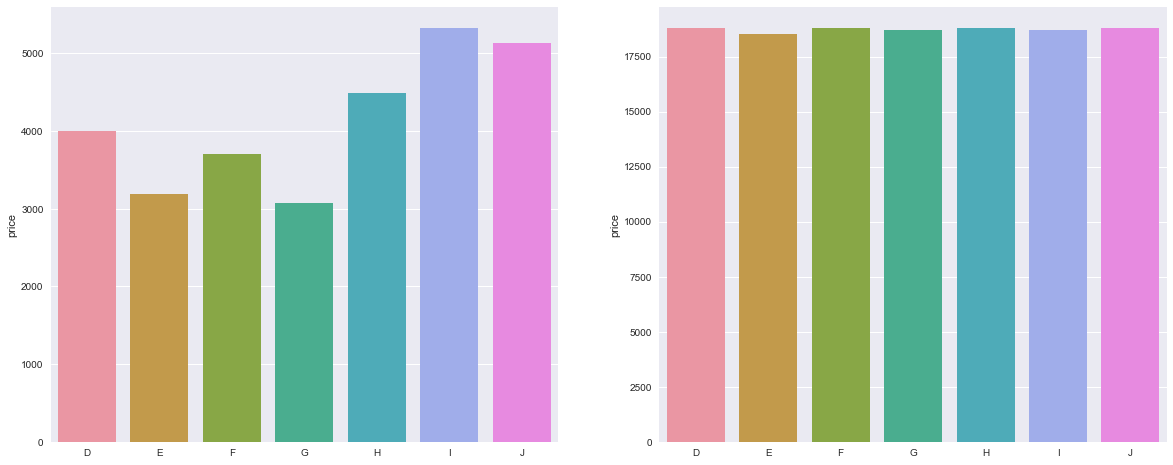

In [481]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(ax=axes[0], x=df['color'].unique(), y=df['price'].groupby(df['color']).mean(), order=np.sort(df['color'].unique()))
sns.barplot(ax=axes[1], x=df['color'].unique(), y=df['price'].groupby(df['color']).max(),order=np.sort(df['color'].unique()))

<AxesSubplot:ylabel='price'>

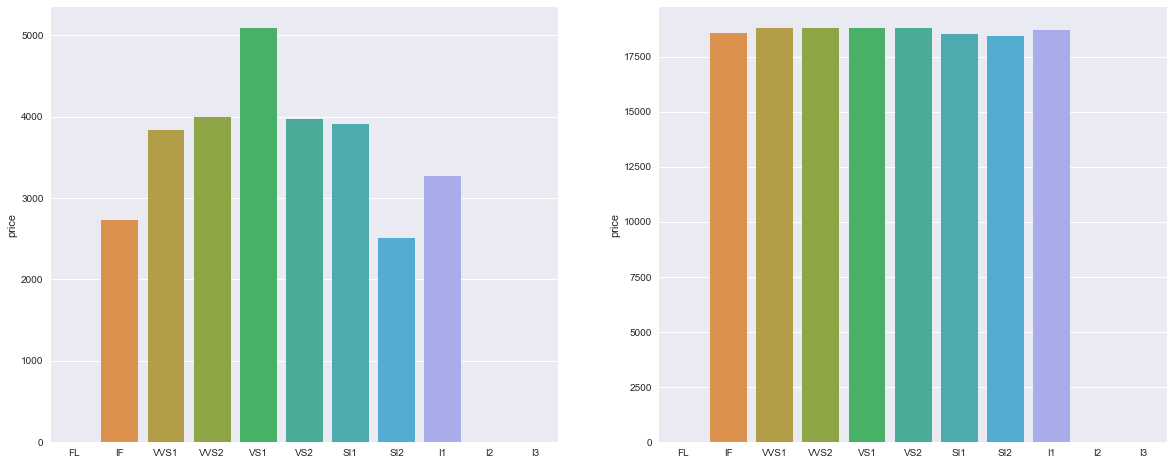

In [482]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(ax=axes[0], x=df['clarity'].unique(), y=df['price'].groupby(df['clarity']).mean(),order=['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])
sns.barplot(ax=axes[1], x=df['clarity'].unique(), y=df['price'].groupby(df['clarity']).max(),order=['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

<AxesSubplot:ylabel='price'>

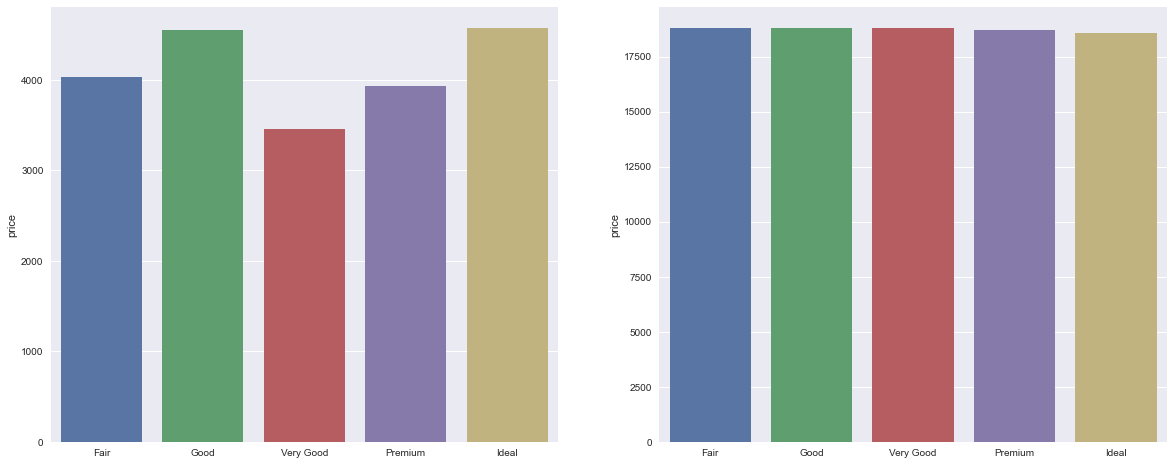

In [483]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(ax=axes[0], x=df['cut'].unique(), y=df['price'].groupby(df['cut']).mean(),order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
sns.barplot(ax=axes[1], x=df['cut'].unique(), y=df['price'].groupby(df['cut']).max(),order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

In [484]:
import scipy.stats as stats

crstb_1 = pd.crosstab(df['cut'],df['color'])
print(crstb_1)
observed_vals_1 = crstb_1.values
print('The observed frequencies are:\n',observed_vals_1,'\n')
chi2_1, p_1, dof_1, expected_vals_1 = stats.chi2_contingency(observed_vals_1)
print('The test statistic:', chi2_1)
print('The p-value of the test:', p_1)
print('The degrees of freedom of the test:', dof_1)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_1.round(0).astype(int))
if p_1<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

color         D     E     F     G     H     I    J
cut                                               
Fair         74   100   148   147   150    94   68
Good        311   491   454   419   352   253  161
Ideal      1409  1966  1893  2470  1552  1073  453
Premium     808  1174  1167  1471  1161   711  407
Very Good   742  1186  1067  1154   887   640  354
The observed frequencies are:
 [[  74  100  148  147  150   94   68]
 [ 311  491  454  419  352  253  161]
 [1409 1966 1893 2470 1552 1073  453]
 [ 808 1174 1167 1471 1161  711  407]
 [ 742 1186 1067 1154  887  640  354]] 

The test statistic: 181.60731458430337
The p-value of the test: 3.612478166303676e-26
The degrees of freedom of the test: 24
The expected frequencies, based on the marginal sums of the table:
 [[  97  142  137  164  119   80   42]
 [ 303  445  428  512  371  251  131]
 [1341 1972 1897 2271 1645 1111  579]
 [ 855 1258 1210 1448 1049  709  369]
 [ 748 1099 1057 1266  917  620  323]]
Reject H0: The variables are correl

In [485]:
crstb_2 = pd.crosstab(df['clarity'],df['color'])
print(crstb_2)
observed_vals_2 = crstb_2.values
print('The observed frequencies are:\n',observed_vals_2,'\n')
chi2_2, p_2, dof_2, expected_vals_2 = stats.chi2_contingency(observed_vals_2)
print('The test statistic:', chi2_2)
print('The p-value of the test:', p_2)
print('The degrees of freedom of the test:', dof_2)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_2.round(0).astype(int))
if p_2<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

color       D     E     F     G     H    I    J
clarity                                        
I1         25    54    67    68    82   48   21
IF         38    87   183   342   149   69   26
SI1      1040  1249  1088  1001  1082  725  386
SI2       671   849   753   779   796  469  258
VS1       369   625   672  1078   595  480  274
VS2       804  1202  1107  1205   804  603  374
VVS1      121   342   360   507   288  183   38
VVS2      276   509   499   681   306  194   66
The observed frequencies are:
 [[  25   54   67   68   82   48   21]
 [  38   87  183  342  149   69   26]
 [1040 1249 1088 1001 1082  725  386]
 [ 671  849  753  779  796  469  258]
 [ 369  625  672 1078  595  480  274]
 [ 804 1202 1107 1205  804  603  374]
 [ 121  342  360  507  288  183   38]
 [ 276  509  499  681  306  194   66]] 

The test statistic: 954.1653110821163
The p-value of the test: 1.02315335212344e-172
The degrees of freedom of the test: 42
The expected frequencies, based on the marginal sums of th

In [486]:
crstb_3 = pd.crosstab(df['cut'],df['clarity'])
print(crstb_3)
observed_vals_3 = crstb_3.values
print('The observed frequencies are:\n',observed_vals_3,'\n')
chi2_3, p_3, dof_3, expected_vals_3 = stats.chi2_contingency(observed_vals_3)
print('The test statistic:', chi2_3)
print('The p-value of the test:', p_3)
print('The degrees of freedom of the test:', dof_3)
print('The expected frequencies, based on the marginal sums of the table:\n', expected_vals_3.round(0).astype(int))
if p_3<0.05: print('Reject H0: The variables are correlated.')
else: print('Accept H0: The variables are independent.')

clarity     I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                    
Fair        89    4   193   225    93   129    10    38
Good        51   30   765   530   331   491   100   143
Ideal       74  613  2150  1324  1784  2528  1036  1307
Premium    108  115  1809  1449   998  1697   307   416
Very Good   43  132  1654  1047   887  1254   386   627
The observed frequencies are:
 [[  89    4  193  225   93  129   10   38]
 [  51   30  765  530  331  491  100  143]
 [  74  613 2150 1324 1784 2528 1036 1307]
 [ 108  115 1809 1449  998 1697  307  416]
 [  43  132 1654 1047  887 1254  386  627]] 

The test statistic: 1967.7566237967862
The p-value of the test: 0.0
The degrees of freedom of the test: 28
The expected frequencies, based on the marginal sums of the table:
 [[  11   26  190  132  119  177   53   73]
 [  33   81  595  414  370  552  166  229]
 [ 146  359 2636 1835 1642 2446  738 1015]
 [  93  229 1681 1170 1047 1560  470  648]
 [  82  200 

In [487]:
df['depth'].groupby(df['cut']).median()

cut
Fair         65.0
Good         63.3
Ideal        61.8
Premium      61.4
Very Good    62.1
Name: depth, dtype: float64

In [488]:
df_fair = df[(df['cut']=='Fair')]; df_fair['depth'] = df_fair['depth'].fillna(65.0)
df_good = df[(df['cut']=='Good')]; df_good['depth'] = df_good['depth'].fillna(63.3)
df_ideal = df[(df['cut']=='Ideal')]; df_ideal['depth'] = df_ideal['depth'].fillna(61.8)
df_premium = df[(df['cut']=='Premium')]; df_premium['depth'] = df_premium['depth'].fillna(61.4)
df_very_good = df[(df['cut']=='Very Good')]; df_very_good['depth'] = df_very_good['depth'].fillna(62.1)

In [489]:
df_v2 = df_fair.append(df_good); df_v2 = df_v2.append(df_ideal); df_v2 = df_v2.append(df_premium); df_v2 = df_v2.append(df_very_good)

In [490]:
df_v2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [491]:
df_v2['cut'].unique()

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [492]:
df_v2['cut'].replace('Fair',1, inplace=True)
df_v2['cut'].replace('Good',2, inplace=True)
df_v2['cut'].replace('Very Good',3, inplace=True)
df_v2['cut'].replace('Premium',4, inplace=True)
df_v2['cut'].replace('Ideal',5, inplace=True)

In [493]:
df_v2['cut'].astype(int); df_v2['color'].unique()

array(['G', 'J', 'E', 'F', 'D', 'I', 'H'], dtype=object)

In [494]:
 df_v2['color'].unique()

array(['G', 'J', 'E', 'F', 'D', 'I', 'H'], dtype=object)

In [495]:
df_v2['color'].replace('J',1, inplace=True)
df_v2['color'].replace('I',2, inplace=True)
df_v2['color'].replace('H',3, inplace=True)
df_v2['color'].replace('G',4, inplace=True)
df_v2['color'].replace('F',5, inplace=True)
df_v2['color'].replace('E',6, inplace=True)
df_v2['color'].replace('D',7, inplace=True)

In [496]:
df_v2['cut'].astype(int); df_v2['color'].unique()

array([4, 1, 6, 5, 7, 2, 3], dtype=int64)

In [497]:
df_v2['clarity'].unique()

array(['VS2', 'SI1', 'VVS2', 'SI2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [498]:
df_v2['clarity'].replace('I3',1, inplace=True)
df_v2['clarity'].replace('I2',2, inplace=True)
df_v2['clarity'].replace('I1',3, inplace=True)
df_v2['clarity'].replace('SI2',4, inplace=True)
df_v2['clarity'].replace('SI1',5, inplace=True)
df_v2['clarity'].replace('VS2',6, inplace=True)
df_v2['clarity'].replace('VS1',7, inplace=True)
df_v2['clarity'].replace('VVS2',8, inplace=True)
df_v2['clarity'].replace('VVS1',9, inplace=True)
df_v2['clarity'].replace('IF',10, inplace=True)
df_v2['clarity'].replace('FL',11, inplace=True)

In [499]:
df_v2['clarity'].astype(int); df_v2['clarity'].unique()

array([ 6,  5,  8,  4,  7,  9, 10,  3], dtype=int64)

In [500]:
df_v2_cat = df_v2[['cut','color','clarity']]

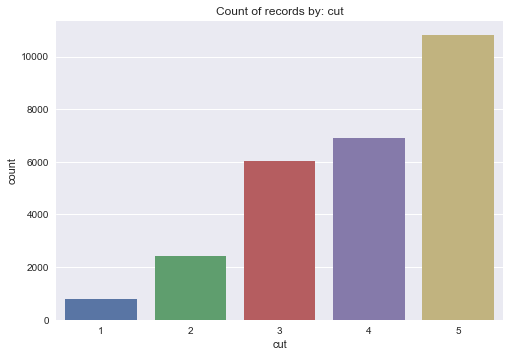

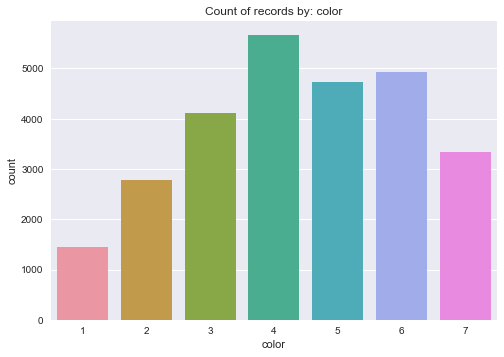

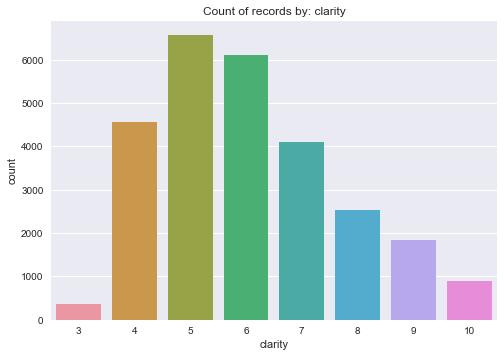

In [501]:
#taking catergorical columns for countplot
for i in df_v2_cat.columns: 
    sns.countplot(df_v2_cat[i]); 
    plt.title('Count of records by: '+i); 
    plt.show()

In [502]:
df_v2_cnt = df_v2[['carat','depth','table','x','y','z','price']]

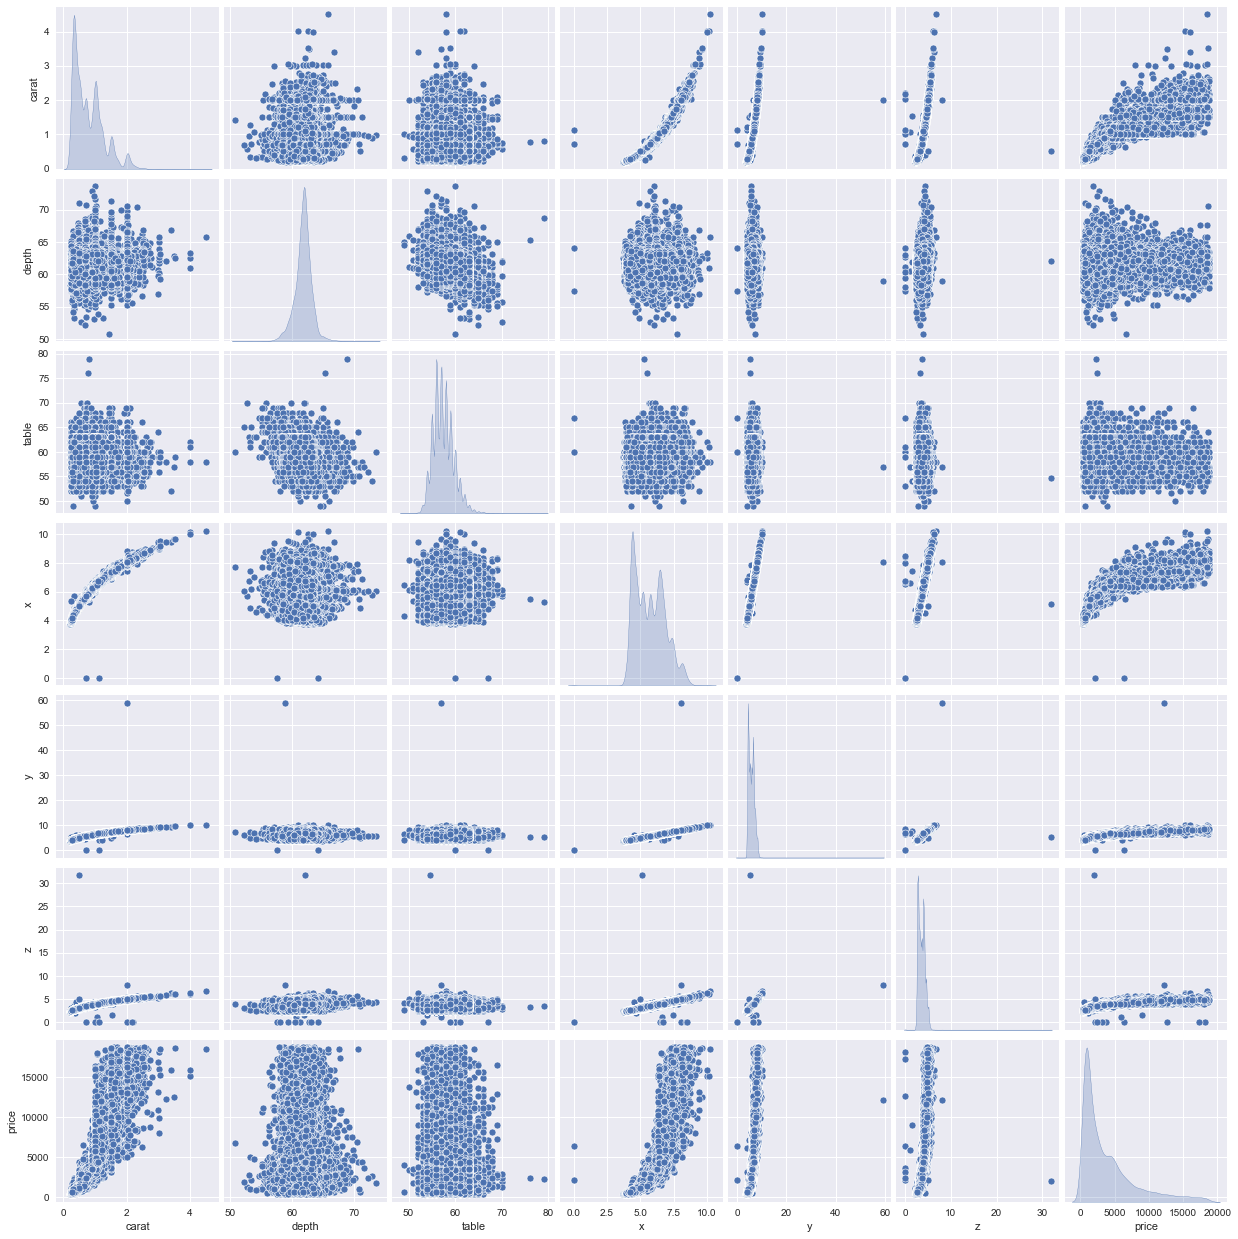

In [503]:
sns.pairplot(data = df_v2_cnt,diag_kind='kde'); plt.show()

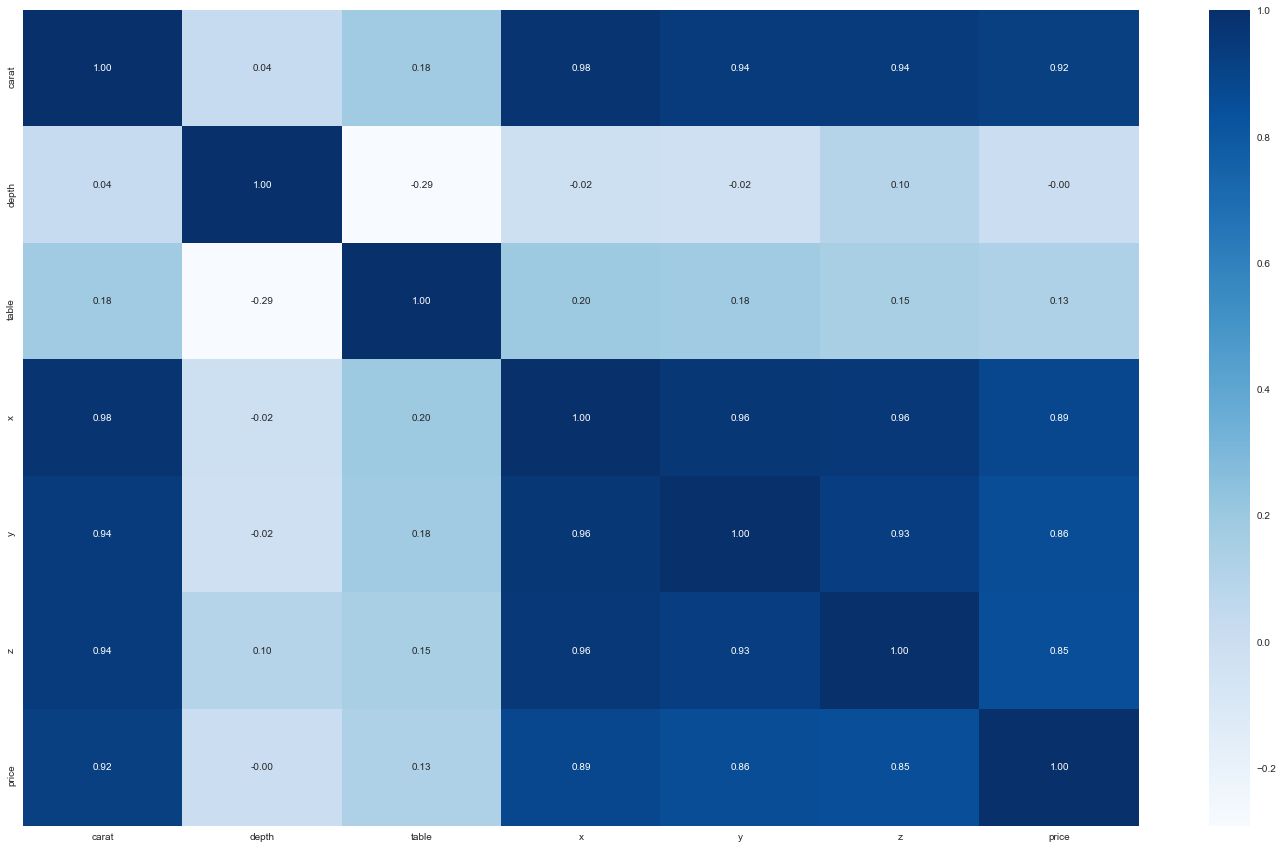

In [504]:
fig = plt.subplots(figsize=(25, 15))

corr = df_v2_cnt.corr(method='pearson')
sns.heatmap(df_v2_cnt.corr(), annot=True,fmt='.2f',cmap='Blues'); plt.show()

In [505]:
df_v2[(df_v2['x']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
17506,1.14,1,4,7,57.5,67.0,0.0,0.0,0.0,6381
5821,0.71,2,5,4,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,2,5,4,64.1,60.0,0.0,0.0,0.0,2130


In [506]:
df_v2[(df_v2['y']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
17506,1.14,1,4,7,57.5,67.0,0.0,0.0,0.0,6381
5821,0.71,2,5,4,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,2,5,4,64.1,60.0,0.0,0.0,0.0,2130


In [507]:
df_v2[(df_v2['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
17506,1.14,1,4,7,57.5,67.0,0.00,0.00,0.0,6381
5821,0.71,2,5,4,64.1,60.0,0.00,0.00,0.0,2130
6215,0.71,2,5,4,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,4,3,6,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,4,3,5,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,4,3,4,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,4,4,4,63.0,59.0,6.50,6.47,0.0,3696
18194,1.01,4,3,3,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,4,4,3,60.4,59.0,6.71,6.67,0.0,2383


In [508]:
print(df_v2['x'].mean()); print(df_v2['x'].median())

5.72985352467831
5.69


In [509]:
df_v2['x'] = df_v2['x'].replace(0,5.69); df_v2[(df_v2['x']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [510]:
print(df_v2['y'].mean()); print(df_v2['y'].median())

5.733568806318835
5.71


In [511]:
df_v2['y'] = df_v2['y'].replace(0,5.69); df_v2[(df_v2['y']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [512]:
print(df_v2['z'].mean()); print(df_v2['z'].median())

3.5380572551637184
3.52


In [513]:
df_v2['z'] = df_v2['z'].replace(0,5.69); df_v2[(df_v2['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [514]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [515]:
df_con = df_v2[['carat','depth','table','x','y','z']]
vif = [variance_inflation_factor(df_con.values, x) for x in range(df_con.shape[1])]

col_1 = list()
col_2 = list()

for idx, col_name in enumerate(df_con.columns):
    col_1.append(col_name)
    col_2.append(vif[idx])

df_vif = pd.DataFrame.from_dict({'feature':col_1,'vif':col_2})

df_vif

,feature,vif
0,carat,76.940137
1,depth,502.409638
2,table,499.524441
3,x,1065.123192
4,y,348.101865
5,z,367.471980


In [521]:
for i in range(0, len(df_con.columns)):
    y = df_con.loc[:, df_con.columns == df_con.columns[i]]
    x = df_con.loc[:, df_con.columns != df_con.columns[i]]
    model = OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print("R Square value of {} column is {} keeping all other columns as features".format(df_con.columns[i], (round(rsq, 2)))
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            df_con.columns[i], vif)
        )

R Square value of carat column is 0.99 keeping all other columns as features
Variance Inflation Factor of carat column is 76.94 

R Square value of depth column is 1.0 keeping all other columns as features
Variance Inflation Factor of depth column is 502.41 

R Square value of table column is 1.0 keeping all other columns as features
Variance Inflation Factor of table column is 499.52 

R Square value of x column is 1.0 keeping all other columns as features
Variance Inflation Factor of x column is 1065.12 

R Square value of y column is 1.0 keeping all other columns as features
Variance Inflation Factor of y column is 348.1 

R Square value of z column is 1.0 keeping all other columns as features
Variance Inflation Factor of z column is 367.47 



In [435]:
lrg_model3 = LinearRegression()
lrg_model3.fit(X_train,y_train)
y_test_pred = lrg_model3.predict(X_test)
print(lrg_model3.score(X_test, y_test))
print(metrics.mean_squared_error(y_test, y_test_pred, squared=False))

0.9085290266508232
1244.6898042407538


In [162]:
df_v3 = df_v2.copy()

In [163]:
X = df_v3.drop('price', axis=1, inplace=False)
y = df_v3.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Running a decision tree model to check the importance of variables

In [164]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X, y)

DecisionTreeRegressor()

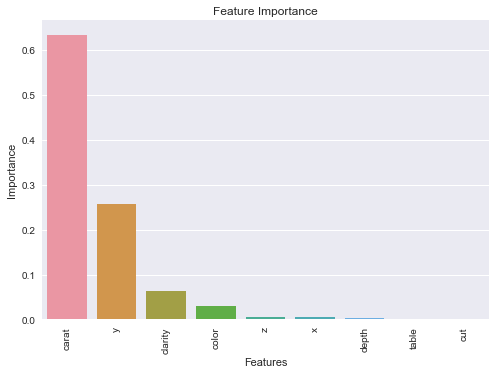

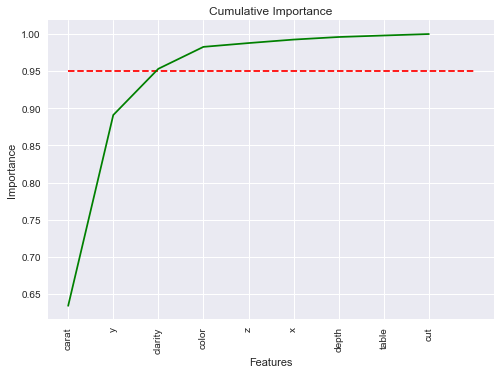

In [165]:
importances = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(dt.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

### Running a random forest model to check the importance of variables

In [166]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

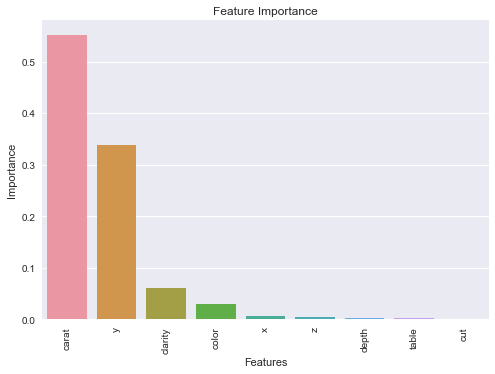

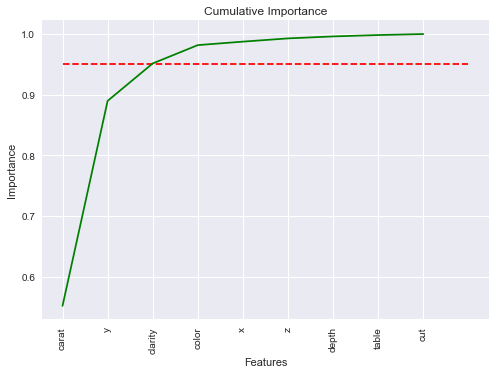

In [167]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

From both the importance plots we can see carat, y, clarity and cut are of highest importance in predicting the price

## Running the linear regression model with all the variables

In [168]:
lrg_model = LinearRegression()
lrg_model.fit(X_train,y_train)
lrg_model

LinearRegression()

In [169]:
lrg_model.intercept_

2274.8822585507605

In [170]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lrg_model.coef_[idx]))

The coefficient for carat is 10934.177886789888
The coefficient for cut is 116.27252702413918
The coefficient for color is 323.3983461269049
The coefficient for clarity is 491.3552949188948
The coefficient for depth is -79.84098615592046
The coefficient for table is -28.22134251479749
The coefficient for x is -920.8281954941543
The coefficient for y is 11.88861796771937
The coefficient for z is -46.8254393635604


In [171]:
col_1 = list()
col_2 = list()

for idx, col_name in enumerate(X_train.columns):
    col_1.append(col_name)
    col_2.append(lrg_model.coef_[idx])

df_coef = pd.DataFrame.from_dict({'feature':col_1,'coef':col_2})

df_coef

,feature,coef
0,carat,10934.177887
1,cut,116.272527
2,color,323.398346
3,clarity,491.355295
4,depth,-79.840986
5,table,-28.221343
6,x,-920.828195
7,y,11.888618
8,z,-46.825439


In [172]:
lrg_model.score(X_train, y_train)

0.9079756907617843

## Running the linear regression model using statsmodel library

In [173]:
import statsmodels.regression.linear_model as lm

x_train = sm.add_constant(X_train)

lrg_model2 = lm.OLS(y_train, x_train).fit()

In [174]:
lrg_model2.rsquared

0.9079756907617843

In [175]:
lrg_model2.params

const       2274.882259
carat      10934.177887
cut          116.272527
color        323.398346
clarity      491.355295
depth        -79.840986
table        -28.221343
x           -920.828195
y             11.888618
z            -46.825439
dtype: float64

In [176]:
print(lrg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.068e+04
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:27:37   Log-Likelihood:            -1.6075e+05
No. Observations:               18876   AIC:                         3.215e+05
Df Residuals:                   18866   BIC:                         3.216e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2274.8823    717.100      3.172      0.0

## Dropping the y and z columns, as we have seen they are highly correlated to y and testing the performance of model without them

In [197]:
df_v4 = df_v2.copy()

In [198]:
X = df_v4.drop({'price','x','y','z'}, axis=1, inplace=False)
y = df_v4.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Running the random forest regressor to get the importance of variables in trimmed down version of data set

In [199]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

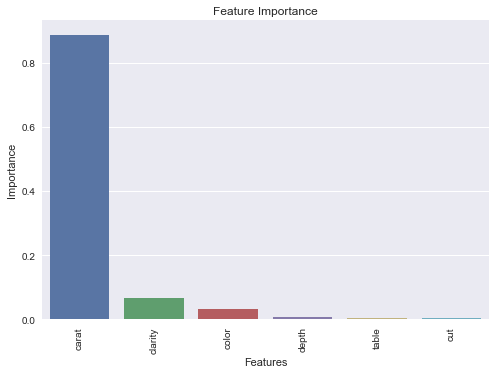

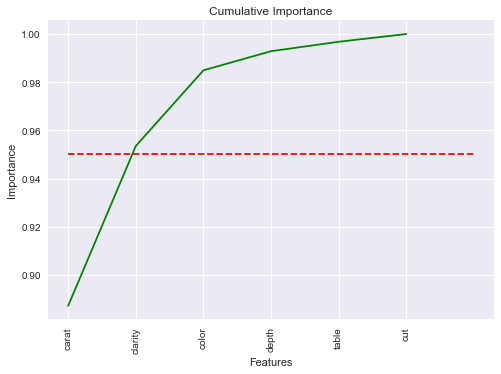

In [200]:
importances = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns)
importances['features'] = pd.DataFrame(rf.feature_importances_, columns = ['Imp'], index = X.columns).index
importances.reset_index

importances = importances.sort_values(by='Imp', ascending=False)
importances.set_index(np.arange(0,importances.shape[0]),inplace = True)

importances['cumsum'] = np.cumsum(importances.Imp)
x_vals = list(range(len(importances)))

sns.barplot(data = importances, x='features', y='Imp')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');
plt.show()

plt.plot(x_vals, importances['cumsum'], 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_vals, importances['features'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Cumulative Importance');
plt.show()

Even with the trimmed down version of dataset, carat, y, clarity and color continue to dominate the importance of price prediction

# Running the linear regression on the trimmed down version(without x, and z) of dataset

In [201]:
lrg_model2 = LinearRegression()
lrg_model2.fit(X_train,y_train)
lrg_model2

LinearRegression()

In [202]:
lrg_model2.intercept_

-4067.327342322801

In [203]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lrg_model2.coef_[idx]))

The coefficient for carat is 8787.720004309593
The coefficient for cut is 121.27104240224563
The coefficient for color is 319.16596444752565
The coefficient for clarity is 514.1259618560017
The coefficient for depth is -39.73712724426822
The coefficient for table is -27.08286615296291


The R-squared score of the model ~90.6%, which is very close to the score we got with all the variables

In [363]:
lrg_model2.score(X_train, y_train)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 5)

## Further reducing the variables and keeping carat, y, clarity and color 

In [446]:
df_v5 = df_v2.copy()

X = df_v5.drop({'price','y','z','depth','table'}, axis=1, inplace=False)
y = df_v5.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

import statsmodels.tools as sm
import statsmodels.regression.linear_model as lm

x_train = sm.add_constant(X_train)

lrg_model3 = lm.OLS(y_train, x_train).fit()

print(lrg_model3.summary())

print('RMSE --->',np.sqrt(lrg_model3.mse_resid))
print('AIC ---->',lrg_model3.aic)
print('Adj R-sq>',lrg_model3.rsquared_adj)

lrg_model3 = LinearRegression()
lrg_model3.fit(X_train,y_train)
y_test_pred = lrg_model3.predict(X_test)
print('R-sqr   >',lrg_model3.score(X_test, y_test))
print('RMSETest>',metrics.mean_squared_error(y_test, y_test_pred, squared=False))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 3.696e+04
Date:                Fri, 25 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:34:48   Log-Likelihood:            -1.6082e+05
No. Observations:               18876   AIC:                         3.216e+05
Df Residuals:                   18870   BIC:                         3.217e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4893.5022    163.228    -29.980      0.0

In [449]:
col_1 = list()
col_2 = list()

for idx, col_name in enumerate(X_train.columns):
    col_1.append(col_name)
    col_2.append(lrg_model3.coef_[idx])

df_coef = pd.DataFrame.from_dict({'feature':col_1,'coefficients':col_2})

df_coef

,feature,coefficients
0,carat,10689.614294
1,cut,160.924460
2,color,325.878410
3,clarity,497.614673
4,x,-835.107554


In [450]:
lrg_model3.intercept_

-4893.502238988806

<AxesSubplot:xlabel='price', ylabel='carat'>

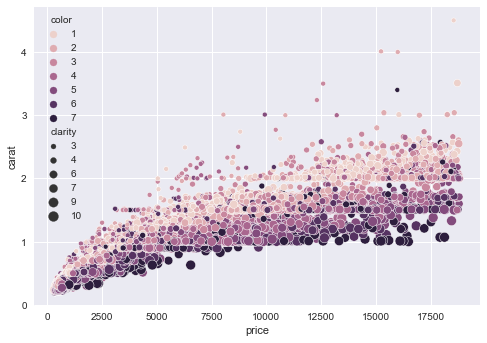

In [469]:
sns.scatterplot(y=df_v2.carat, x=df_v2.price, hue=df_v2.color,size=df_v2.clarity)